# Explore here

In [21]:
import pandas as pd

df= pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", delimiter=',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
df[['region']].groupby('region').value_counts()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: count, dtype: int64

In [23]:
df[['sex']].groupby('sex').value_counts()

sex
female    662
male      676
Name: count, dtype: int64

In [24]:
df[['smoker']].groupby('smoker').value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [25]:
# Reemplazar valores categóricos con binarios
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

# Crear variables dummy para la columna 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=False, dtype=int)
df


/tmp/ipykernel_12312/804932937.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
/tmp/ipykernel_12312/804932937.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


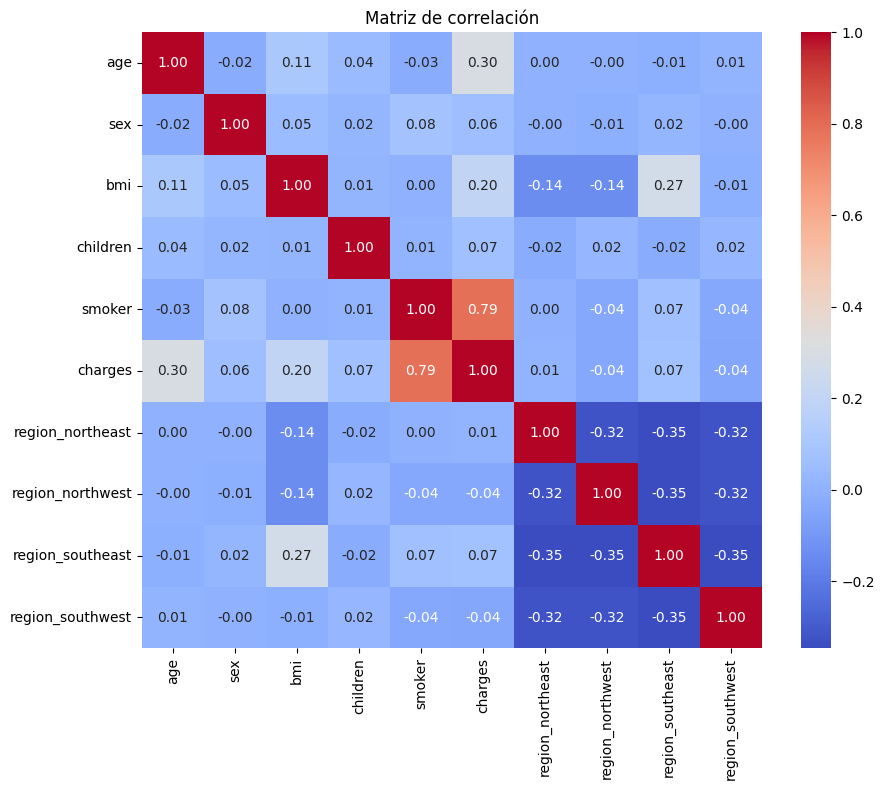

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

#No hay multicolinealidad en estos datos, se visualiza que las regiones tienen una correlacion moderada negativa entre ellas, pero bastante cercanas al 0 con las demas, incluyendo la variable objetivo, pero no significa que no sean importantes en la prediccion de precios de seguro.
#entonces no eliminare mas variables y dejare que el modelo aprenda con lo que hay disponible

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Dividir datos en características (X) y variable objetivo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Entrenar el modelo de bosque aleatorio
model = RandomForestRegressor()
model.fit(X, y)

# Mostrar la importancia de las características
print(model.feature_importances_)

[0.12950268 0.00548755 0.20611091 0.01878111 0.62253554 0.00504405
 0.00515742 0.00427189 0.00310885]


In [ ]:
# Suponiendo que 'features_to_drop' contiene los nombres de las características que deseas eliminar
caracteristicas_eliminar = [i for i, imp in enumerate(importancias) if imp < umbral]

# Muestra las características que se eliminarán
print("Características a eliminar:", caracteristicas_eliminar)

In [28]:
#hago regresion para obtener el precio base del seguro primero:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definir características (X) y objetivo (y)
X = df.drop(columns=['charges'])  # Todas las columnas excepto 'charges'
y = df['charges'].round()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un nuevo modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los precios del seguro en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) con valores absolutos
mse_abs = mean_squared_error(y_test, y_pred, squared=False)
print("Error cuadrático medio con valores absolutos:", mse_abs)

# Obtener los coeficientes de la regresión
coefficients = model.coef_

# Obtener el intercepto
intercept = model.intercept_

# Mostrar los coeficientes de la regresión y el intercepto
print("Intercepto:", intercept)
print("Coeficientes:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")
#el error de las predicciones tiene una diferencia de 5797 con relacion al promedio de los datos reales 
#el intercepto
#edad, relacionado a un aumento en el precio
#sexo, relacionado a una disminucion en el precio, esto indica que las mujeres podrian tener un costo fijo mas bajo que los hombres
#bmi, esta relacionado a un aumento en el precio por cada unidad de aumento en su valor
#hijos, relacionado a un aumento por cada unidad de aumento
#fumador, el mayor aumento en el precio base ya que puede incidir en enfermedades que aparezcan en cualquier edad.
#luego vemos que hay diferencia de aumento o disminucion de la media de los precios dependiendo de la region, unas efectivamente, son mas caras que otras.

Error cuadrático medio con valores absolutos: 5796.259519869707
Intercepto: -12390.76684758635
Coeficientes:
age: 256.976191463872
sex: -18.62784573439683
bmi: 337.09127453758606
children: 425.2648140148302
smoker: 23651.15001611241
region_northeast: 459.5679139544713
region_northwest: 88.91782051477314
region_southeast: -198.27505410017582
region_southwest: -350.2106803690692


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
import numpy as np

# Calcular el RMSE
rmse = np.sqrt(mse)
mean_y = df['charges'].mean()

# Calcular el error relativo en porcentaje
error_relativo_porcentaje = (rmse / mean_y) * 100
print("error_relativo:", error_relativo_porcentaje)
#esto significa que el 47% de las predicciones del modelo se desvian de la media de la variable objetivo, o sea, los datos que se alejan de la media objetivo, lo hacen hasta un 47%

NameError: name 'mse' is not defined

In [ ]:
# Predecir los precios del seguro para todas las filas en el DataFrame original
df['base_price'] = model.predict(X).round()
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,base_price
0,19,0,27.900,0,1,16884.92400,0,0,0,1,25198.0
1,18,1,33.770,1,0,1725.55230,0,0,1,0,3827.0
2,28,1,33.000,3,0,4449.46200,0,0,1,0,6987.0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,3813.0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,5638.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0,12244.0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0,3454.0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0,4458.0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1,1352.0
